# Modul 5 : Perbaikan Kualitas Citra

## 1. Lakukan perbaikan citra pada gambar sunf_2.jpg dengan menggunakan window/kernel 3x3, 5x5 dan 7x7 dengan menerapkan proses filtering :
## a. mean
## b. median
## c. modus

In [1]:
import cv2 as cv
#baris ini mengimport library OpenCV sebagai cv. OpenCV adalah library populer untuk pengolahan citra.
import matplotlib.pyplot as plt
#baris ini mengimport library matplotlib sebagai plt. matplotlib adalah library populer untuk membuat visualisasi data, termasuk visualisasi gambar.
import numpy as np
#baris ini mengimport library NumPy sebagai np. NumPy adalah library populer untuk komputasi numerik dalam Python.

Text(0.5, 1.0, 'Original Image')

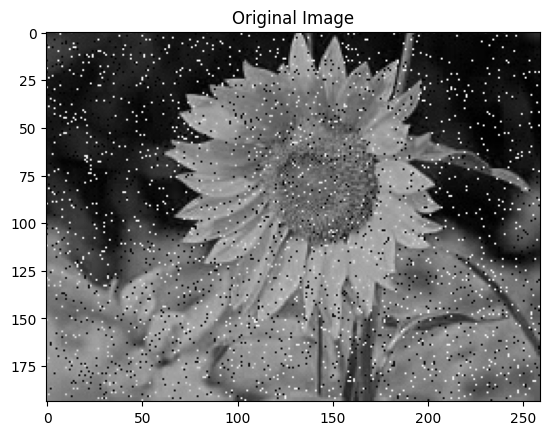

In [2]:
image = plt.imread("bunga.jpg")
#baris ini membaca gambar "bunga.jpg" menggunakan fungsi imread dari library matplotlib dan menyimpannya dalam variabel image.
image = cv.cvtColor(image,cv.COLOR_BGR2GRAY)
#baris ini mengubah mode warna gambar dari RGB menjadi grayscale menggunakan fungsi cvtColor dari library OpenCV. COLOR_BGR2GRAY merupakan konstanta yang digunakan untuk mengubah gambar dari mode warna BGR menjadi grayscale.
plt.imshow(image, cmap="gray")
#baris ini menampilkan gambar grayscale menggunakan fungsi imshow dari library matplotlib. Parameter cmap="gray" digunakan untuk menampilkan gambar dalam skala warna grayscale.
plt.title("Original Image")
#baris ini menambahkan judul "Original Image" pada tampilan gambar menggunakan fungsi title dari library matplotlib.

### Konvolusi

#### Function Berikut berfungsi untuk mendapatkan lapisan padding kiri kanan atas dan bawah dari sebuah citra secara dinamis dengan bergantung kepada kernel. Proses pertama yaitu mendapatkan titik tengah dari kernel dengan membagi dua lebar dan tinggi dari kernel. Selanjutnya mendapatkan nilai kiri dan atas yang secara otomatis di dapatkan dari titik tengah kemudian mendapatkan kanan dengan mengurangi panjang dengan titik tengah i dan nilai bawah dengan mengurangi lebar dengan titik tengah j. Setelah didapatkan nilai kiri kanan atas dan bawah, lalu meyiapkan variabel citra padding dengan memasukkan nilai atas bawah kiri dan kanan

In [3]:
def getPadding (image, kernel):
#baris ini mendefinisikan sebuah fungsi bernama getPadding dengan dua parameter masukan: image dan kernel.
    i = (kernel.shape[1]-1)//2
    #Baris ini menghitung indeks baris dan kolom untuk titik tengah kernel.
    j = (kernel.shape[0]-1)//2
    #Baris ini menghitung jumlah piksel yang perlu ditambahkan pada sisi kiri dan kanan gambar agar seluruh kernel dapat diterapkan pada gambar.
    kiri = i
    kanan = (kernel.shape[1]-1)-i
    #Baris ini menghitung jumlah piksel yang perlu ditambahkan pada sisi kiri dan kanan gambar agar seluruh kernel dapat diterapkan pada gambar.
    atas = j
    bawah = (kernel.shape[0]-1)-j
    # Baris ini menghitung jumlah piksel yang perlu ditambahkan pada sisi atas dan bawah gambar agar seluruh kernel dapat diterapkan pada gambar.

    result = np.pad(image,((atas,bawah),(kiri,kanan)), 'constant', constant_values=0)
    #Baris ini menggunakan fungsi np.pad() dari library NumPy untuk menambahkan lapisan padding pada gambar image. Fungsi ini menerima empat parameter:
    return result

#### Function berikut berfungsi untuk melakukan konvolusi pada citra berdasarkan kernel yang diinginkan. Proses pertama menyiapkan variabel hasil dengan ukuran sama dengan citra asli dengan nilai awal nol menggunakan numpt zeros. Selanjutnya membuat citra yang telah dipaddingan dengan memanggil function padding sebelumnya. Selanjutnya melakukan perulangan untuk mengakses citra, 2 perulangan pertama untuk mengakses citra asli , 2 perulangan selanjutnya untuk mengakses kernel, setiap iterasi nantinya akan membagi citra padding menjadi bagian bagian sebesar kernel, kemudian dilakukan perkalian sekalar terhadap sub citra padding dengan kernel lalu dihitung totalnya atau summary dan disimpan ke variabel sum, hasil dari sum tersebut nantinya akan disimpan ke variabel hasil

In [4]:
def konvolusi(image, kernel):
#baris ini mendefinisikan sebuah fungsi bernama konvolusi dengan dua parameter masukan: image dan kernel.
    result = np.zeros(image.shape).astype(int)
    # Baris ini membuat sebuah array dengan ukuran yang sama dengan gambar image dan diinisialisasi dengan nilai nol.
    imgPad = getPadding(image,kernel)
    #Baris ini memanggil fungsi getPadding untuk menambahkan lapisan padding pada gambar image berdasarkan ukuran kernel.
    for i in range(image.shape[0]):
    #Baris ini memulai loop untuk setiap baris pada gambar image.
        for j in range(image.shape[1]):
        #Baris ini memulai loop untuk setiap kolom pada gambar image.
            sum = 0
            # Baris ini menginisialisasi variabel sum dengan nilai nol.
            for k in range(kernel.shape[0]):
            #Baris ini memulai loop untuk setiap baris pada kernel.
                for l in range(kernel.shape[1]):
                #Baris ini memulai loop untuk setiap kolom pada kernel.
                    sum += imgPad[i+k][j+l] * kernel[k, l]
                    #Baris ini menghitung nilai konvolusi pada titik (i, j) pada gambar image berdasarkan nilai piksel pada gambar yang telah di-pad dan nilai kernel yang diberikan.
            result[i, j] = sum
            #Baris ini menyimpan nilai konvolusi pada array result pada titik (i, j).
    return result

### A. Mean Filtering

#### Function berikut berfungsi untuk mendapatkan nilai mean atau rata rata dari sub bagian citra berdasarkan besar dari kernel inputan dengan menggunakan function konvolusi sebelumnya. proses pertama menentukan kernel yang dimana ukuran dari kernel telah diinputkan kemudian mendapatkan nilai per elemen dari kernel dengan 1/luas kernel, kemudian menggunakan numpy full agar semua nilai dari setiap elemen kernel sama. Selanjutnya melakukan konvolusi pada citra asli dengan kernel yang telah dibuat

In [5]:
def meanFilter (image, lebarKernel, tinggiKernel):
#baris ini mendefinisikan sebuah fungsi bernama meanFilter dengan tiga parameter masukan: image, lebarKernel, dan tinggiKernel.
    kernel = np.full((lebarKernel, tinggiKernel), 1/(lebarKernel*tinggiKernel))
    #Baris ini membuat kernel dengan ukuran lebarKernel x tinggiKernel dan diinisialisasi dengan nilai yang sama pada setiap elemennya. Nilai pada kernel dihitung dengan membagi 1 dengan luas kernel.
    result = konvolusi(image, kernel)
    #Baris ini memanggil fungsi konvolusi untuk melakukan operasi konvolusi pada gambar image dengan menggunakan kernel yang telah dibuat sebelumnya.
    return result

Text(0.5, 1.0, 'Mean Filtering 7x7')

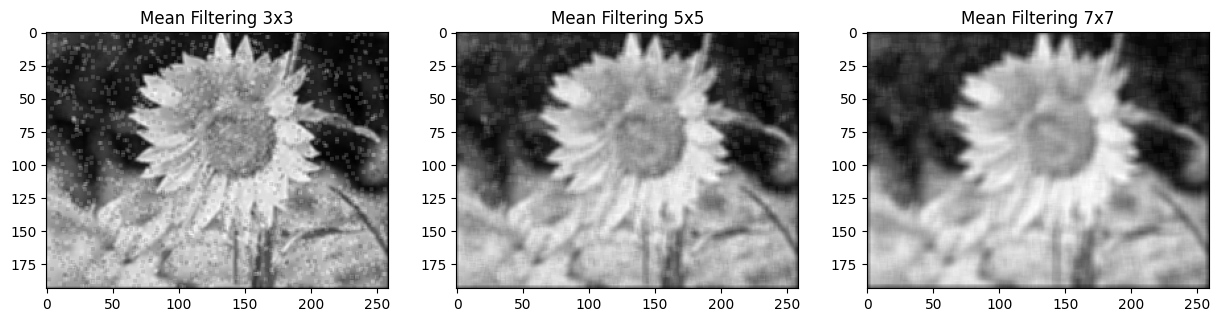

In [6]:
mean3x3 = meanFilter(image,3,3)
mean5x5 = meanFilter(image,5,5)
mean7x7 = meanFilter(image,7,7)
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,7))
ax[0].imshow(mean3x3, cmap="gray")
ax[0].set_title('Mean Filtering 3x3')
ax[1].imshow(mean5x5, cmap="gray")
ax[1].set_title('Mean Filtering 5x5')
ax[2].imshow(mean7x7, cmap="gray")
ax[2].set_title('Mean Filtering 7x7')

### B. Median Filtering

#### Function berikut berfungsi untuk mendapatkan nilai tengah dari suatu array. Proses pertama melakukan pengurutan setiap elemen pada array dengan menggunakan function sort, lalu mendapatkan indeks titik tengah dengan membagikan panjang array dengan angka 2 yang dibulatkan ke bawah. Kemudian membuat kondisi untuk memeriksa apakah panjang array genap, jika iya maka nilai dari titik tengah akan didapatkan dari rata rata dari nilai titik tengah sementara dengan 1 elemen setelahnya, jika tidak, maka nilai titik tengah (midvalue) adalah nilai yang berada pada indeks titik tengah sementara(midIndeks)

In [7]:
def getMid (array):
#Mendefinisikan fungsi getMid yang memiliki satu parameter yaitu array.
    array.sort()
    #Mengurutkan isi dari array secara ascending.
    midIndeks = (len(array)-1)//2
    #Menghitung indeks dari nilai tengah pada array dengan menggunakan rumus (n-1)/2 dimana n adalah panjang dari array.
    if len(array)%2 == 0:
    #Memeriksa apakah panjang dari array merupakan bilangan genap.
        midValue = (array[midIndeks]+array[midIndeks+1])/2
        #Jika panjang dari array genap, maka nilai tengah dihitung dengan cara mengambil rata-rata dari dua nilai pada indeks midIndeks dan midIndeks+1.
    else :
        midValue = array[midIndeks]
        #Jika panjang dari array ganjil nilai tengah dihitung dengan cara mengambil nilai pada indeks midIndeks.
    return midValue


#### Function berikut berfungsi untuk melakukan perbaikan kualitas citra dengan metode Median Filter yang dimana besar dari kernel ditentukan oleh user. Proses pertama membuat variabel kernel(filter) dengan ukuran sesuai inputan dengan menggunakan numpy zeros. Kemudian Menyiapkan variabel hasil(result) dengan ukuran sesuai dengan citra asli. Kemudian menyiapkan varibel citra yang dipadding (imgPad) dengan menggunakan function getPad sebelumnya. Kemudian untuk perulangan menggunakan konsep yang sama dengan konvolusi yang dimana nantinya variabel padding akan dibagi menjadi beberapa bagian(subPadd) dengan ukuran sesuai dengan ukuran kernel, pada jangkauan setiap bagian tersebut akan disimpan ke variabel filter(kernel). kemudian setelah didaptkan nilai filter dilakukan reshape menjadi array 1 dimensi dikarenakan nantinya pada function getMid hanya menerima array 1 dimensi. kemudian mendapatkan nilai tengah dari jangkauan median dari citra padding(filter) dengan menggunakan getmid yang telah dibuat sebelumnya dan hasi tersebut disimpan ke variabel hasil

In [8]:
def medianFilter(image, lebarFilter, tinggiFilter):
#image yang merepresentasikan gambar input, lebarFilter yang merepresentasikan lebar filter dan tinggiFilter yang merepresentasikan tinggi filter.
    filter = np.zeros((lebarFilter,tinggiFilter)).astype(int)
    #Membuat filter berukuran lebarFilter x tinggiFilter dengan elemen-elemen yang diisi dengan nilai 0, kemudian diubah tipe datanya menjadi integer.
    result = np.zeros(image.shape)
    #Membuat sebuah array yang berukuran sama dengan gambar input image yang akan digunakan untuk menyimpan hasil filter median nantinya.
    imgPad = getPadding(image,filter)
    #Memanggil fungsi getPadding() yang akan menambahkan border atau padding pada gambar input image dengan menggunakan filter filter.
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            for x in range(lebarFilter):
                for y in range(tinggiFilter):
                    filter[x,y] = imgPad[i+x,j+y]
            filterReshape = filter.reshape(lebarFilter*tinggiFilter)
            result[i,j] = getMid(filterReshape)
            #Melakukan perulangan pada setiap piksel pada gambar input image dengan mengambil setiap blok filter yang berukuran lebarFilter x tinggiFilter.
            #Memanggil fungsi getMid() untuk mendapatkan nilai median dari blok filter yang ada.
            #Menyimpan nilai median tersebut ke dalam array result pada posisi piksel yang sesuai.
            #Kembali ke piksel berikutnya dan melanjutkan proses di atas.
    return result

Text(0.5, 1.0, 'Median Filtering 7x7')

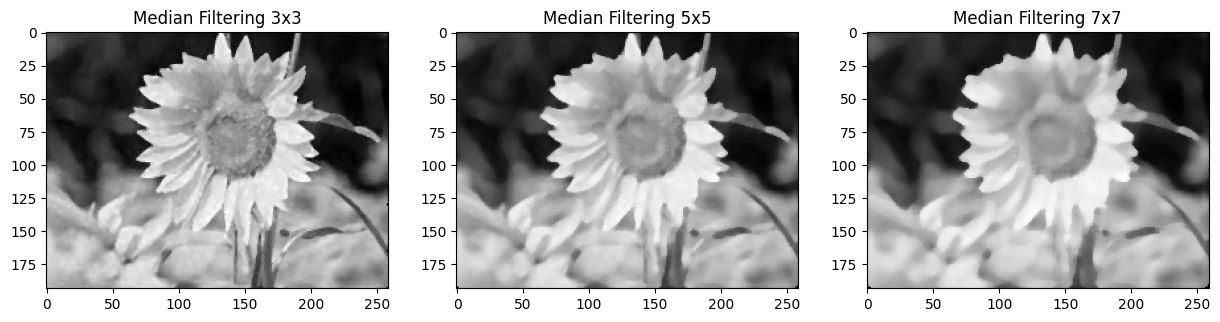

In [9]:
median3x3 = medianFilter(image,3,3)
median5x5 = medianFilter(image,5,5)
median7x7 = medianFilter(image,7,7)
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,7))
ax[0].imshow(median3x3, cmap="gray")
ax[0].set_title('Median Filtering 3x3')
ax[1].imshow(median5x5, cmap="gray")
ax[1].set_title('Median Filtering 5x5')
ax[2].imshow(median7x7, cmap="gray")
ax[2].set_title('Median Filtering 7x7')

### C. Modus Filtering

#### Function berikut berfungsi untuk mendapatkan nilai modus dari sebuah array. Pertama menyiapkan variabel freq atau kemunculan dengan ukuran array bergantung pada nilai tertinggi dari array inputan, kemunculan berfungsi untuk menghitung berapa kemunculan suatu elemen pada array. indeks pada variabel kemunculan berfungsi untuk mewakili setiap elemen pada array inputan dengan cara, pada perulangan melakukan pengecekan apakah i atau indeks dari kemunculan sama dengan value dari array inputan indeks ke j maka, indeks i pada kemunculan akan ditambah 1. kemudian mendapatkan nilai yang paling sering muncul pada array dengan mendapatkan indeks dari elemen tertinggi pada variabel kemunculan dengan menggunakan numpy argmax()

In [10]:
def getModus(array):
#Mendefinisikan sebuah fungsi dengan satu parameter masukan yaitu array yang merepresentasikan sebuah array data.
    kemunculan = np.zeros(array.max()+1).astype(int)
    #Membuat sebuah array dengan ukuran sebanyak nilai maksimum dalam array ditambah 1, kemudian diisi dengan nilai 0 dan diubah tipe datanya menjadi integer.
    for i in range(len(kemunculan)):
        for j in range(len(array)):
            if array[j]==i:
                kemunculan[i] +=1
                # Melakukan perulangan pada setiap elemen pada kemunculan dan array.
                # Jika nilai pada array sama dengan nilai indeks i pada kemunculan, maka nilai kemunculan[i] akan ditambah 1.
    return np.argmax(kemunculan)

#### Function berikut berfungsi untuk melakukan perbaikan kualitas citra dengan metode Modus Filter yang dimana besar dari kernel ditentukan oleh user. Proses pertama membuat variabel kernel(filter) dengan ukuran sesuai inputan dengan menggunakan numpy zeros. Kemudian Menyiapkan variabel hasil(result) dengan ukuran sesuai dengan citra asli. Kemudian menyiapkan varibel citra yang dipadding (imgPad) dengan menggunakan function getPad sebelumnya. Kemudian untuk perulangan menggunakan konsep yang sama dengan konvolusi yang dimana nantinya variabel padding akan dibagi menjadi beberapa bagian(subPadd) dengan ukuran sesuai dengan ukuran kernel, pada jangkauan setiap bagian tersebut akan disimpan ke variabel filter(kernel). kemudian setelah didaptkan nilai filter dilakukan reshape menjadi array 1 dimensi dikarenakan nantinya pada function getModus hanya menerima array 1 dimensi. kemudian mendapatkan nilai modus dari jangkauan modus dari citra padding(filter) dengan menggunakan getmodus yang telah dibuat sebelumnya dan hasil tersebut disimpan ke variabel hasil

In [11]:
def modusFilter(image, lebarFilter, tinggiFilter):
#image yang merepresentasikan gambar input, lebarFilter yang merepresentasikan lebar filter dan tinggiFilter yang merepresentasikan tinggi filter.
    filter = np.zeros((lebarFilter,tinggiFilter)).astype(int)
    result = np.zeros(image.shape)
    #Membuat sebuah filter berukuran lebarFilter x tinggiFilter dengan elemen-elemen yang diisi dengan nilai 0 dan sebuah array result yang berukuran sama dengan gambar input image yang akan digunakan untuk menyimpan hasil filter modus nantinya.
    imgPad = getPadding(image,filter)
    #Memanggil fungsi getPadding() yang akan menambahkan border atau padding pada gambar input image dengan menggunakan filter filter.
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            for x in range(lebarFilter):
                for y in range(tinggiFilter):
                    filter[x,y] = imgPad[i+x,j+y]
            filterReshape = filter.reshape(lebarFilter*tinggiFilter)
            result[i,j] = getModus(filterReshape)
            #Melakukan perulangan pada setiap piksel pada gambar input image dengan mengambil setiap blok filter yang berukuran lebarFilter x tinggiFilter.
            #Memanggil fungsi getModus() untuk mendapatkan nilai modus dari blok filter yang ada.
            #Menyimpan nilai modus tersebut ke dalam array result pada posisi piksel yang sesuai.
            #Kembali ke piksel berikutnya dan melanjutkan proses di atas.
    return result

Text(0.5, 1.0, 'Modus Filtering 7x7')

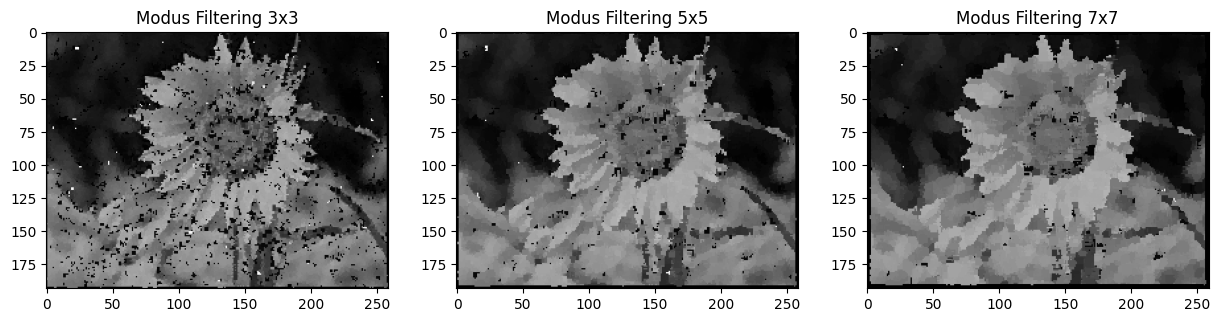

In [14]:
modus3x3 = modusFilter(image,3,3)
modus5x5 = modusFilter(image,5,5)
modus7x7 = modusFilter(image,7,7)
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,7))
ax[0].imshow(modus3x3, cmap="gray")
ax[0].set_title('Modus Filtering 3x3')
ax[1].imshow(modus5x5, cmap="gray")
ax[1].set_title('Modus Filtering 5x5')
ax[2].imshow(modus7x7, cmap="gray")
ax[2].set_title('Modus Filtering 7x7')